In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [7 8 2 2 1 9 2 4 4 2]


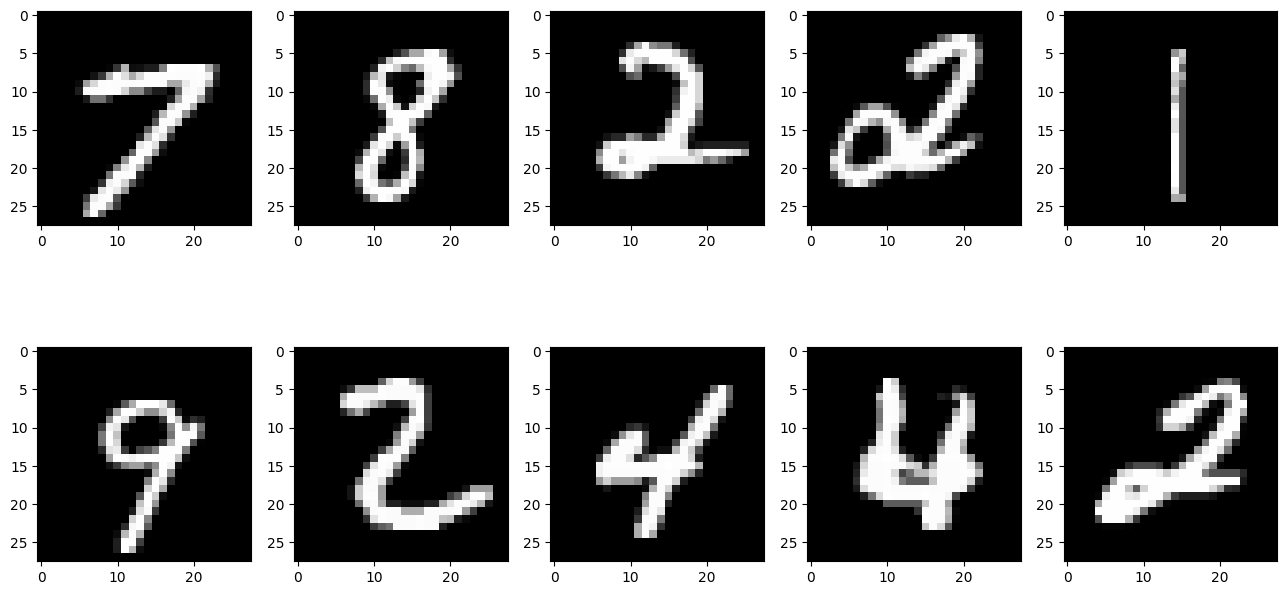

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [9]:
from keras.regularizers import l1_l2

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))  # Add L1 and L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


Train the model

In [11]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.2822 - accuracy: 0.8825
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7215 - accuracy: 0.9187
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6230 - accuracy: 0.9268
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5715 - accuracy: 0.9321
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5342 - accuracy: 0.9352
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5118 - accuracy: 0.9355
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4930 - accuracy: 0.9376
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4809 - accuracy: 0.9384
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4697 - accuracy: 0.9391
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - los

Plot the loss and accuracy graphs

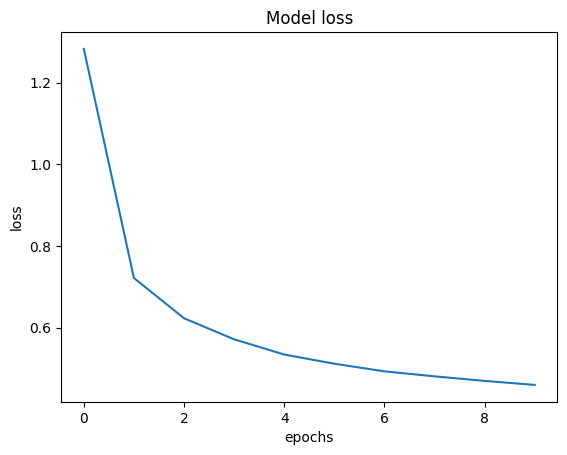

In [12]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

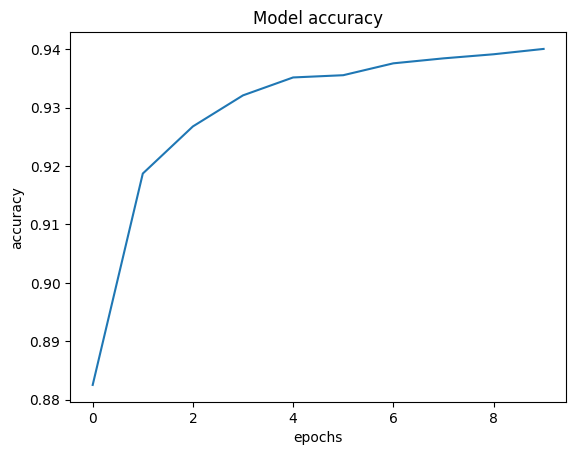

In [13]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [14]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 2s 5ms/step - loss: 0.4477 - accuracy: 0.9413
Loss of the Test dataset is: 0.44774556159973145
Accuracy of the test dataset is: 0.9412999749183655


Save the model weights

In [8]:
model.save_weights('MNIST_WEIGHTS_V1.h5')